In [1]:
from pandas.io.gbq import read_gbq

In [2]:
project = "spheric-crow-161317"
sample_query = "SELECT * FROM `smart_cities_data.mit_streetscore` LIMIT 10"

df = read_gbq(query=sample_query, project_id=project, dialect='standard')


Your browser has been opened to visit:

    https://accounts.google.com/o/oauth2/v2/auth?scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fbigquery&redirect_uri=http%3A%2F%2Flocalhost%3A8080%2F&response_type=code&client_id=495642085510-k0tmvj2m941jhre2nbqka17vqpjfddtd.apps.googleusercontent.com&access_type=offline

If your browser is on a different machine then exit and re-run this
application with the command-line parameter

  --noauth_local_webserver

Authentication successful.
Requesting query... ok.
Query running...
Query done.
Cache hit.

Retrieving results...
Got 10 rows.

Total time taken 1.21 s.
Finished at 2017-03-25 12:58:11.


/usr/local/lib/python2.7/site-packages/oauth2client/_helpers.py:255: UserWarning: Cannot access bigquery_credentials.dat: No such file or directory
  warnings.warn(_MISSING_FILE_MESSAGE.format(filename))


In [5]:
project = "spheric-crow-161317"
sample_query = "SELECT * FROM `bigquery-public-data.new_york.tlc_yellow_trips_2016` LIMIT 10"

df = read_gbq(query=sample_query, project_id=project, dialect='standard')


Requesting query... ok.
Query running...
Query done.
Processed: 8.9 Gb

Retrieving results...
Got 10 rows.

Total time taken 3.31 s.
Finished at 2017-03-25 11:21:23.


In [6]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount
0,1,2016-06-05 04:51:16,2016-06-05 05:14:02,1,10.5,-73.997444,40.716759,1,N,-73.864502,40.757748,2,31.0,0.5,0.5,0.00,0,0.3,32.30
1,1,2016-03-13 19:26:50,2016-03-13 19:47:27,1,3.2,-73.997116,40.742077,1,N,-74.014053,40.708397,2,15.0,0.0,0.5,0.00,0,0.3,15.80
2,1,2016-04-11 12:14:41,2016-04-11 12:17:55,1,0.3,-73.955269,40.779583,1,N,-73.956703,40.782513,2,4.0,0.0,0.5,0.00,0,0.3,4.80
3,1,2016-01-19 20:05:37,2016-01-19 20:11:21,1,1.1,-73.955162,40.777180,1,N,-73.970436,40.785828,1,6.0,0.5,0.5,1.00,0,0.3,8.30
4,1,2016-04-27 20:16:15,2016-04-27 20:20:32,1,0.8,-73.925613,40.759056,1,N,-73.913902,40.761189,1,5.0,0.5,0.5,1.25,0,0.3,7.55


In [2]:

from __future__ import print_function, division

#importing pandas for reading and parsing of tabulated data
import pandas as pd
#importing geopandas read to plot geographical information
import geopandas as gpd
#importing fiona to handle geographical coordinates
import fiona
#import shapely to handle geographical shapes
import shapely

import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [10]:
project = "spheric-crow-161317"
sample_query = "SELECT * FROM `smart_cities_data.NYC_MTA_stations` LIMIT 10"

dfstations = read_gbq(query=sample_query, project_id=project, dialect='standard')


Requesting query... ok.
Query running...
Query done.
Cache hit.

Retrieving results...
Got 10 rows.

Total time taken 0.91 s.
Finished at 2017-03-25 11:33:06.


In [12]:
dfstations.head(20)

,Division,Line,Station_Name,Station_Latitude,Station_Longitude,Route1,Route2,Route3,Route4,Route5,...,ADA,ADA_Notes,Free_Crossover,North_South_Street,East_West_Street,Corner,Entrance_Latitude,Entrance_Longitude,Station_Location,Entrance_Location
0,BMT,4 Avenue,25th St,40.660397,-73.998091,R,None,None,None,None,...,False,None,False,4th Ave,25th St,SE,40.660323,-73.997952,"(40.660397, -73.998091)","(40.660323, -73.997952)"
1,BMT,4 Avenue,25th St,40.660397,-73.998091,R,None,None,None,None,...,False,None,False,4th Ave,25th St,SW,40.660489,-73.998220,"(40.660397, -73.998091)","(40.660489, -73.998220)"
2,BMT,4 Avenue,45th St,40.648939,-74.010006,R,None,None,None,None,...,False,None,True,4th Ave,45th St,NE,40.649265,-74.009457,"(40.648939, -74.010006)","(40.649265, -74.009457)"
3,BMT,4 Avenue,45th St,40.648939,-74.010006,R,None,None,None,None,...,False,None,True,4th Ave,45th St,NE,40.649389,-74.009333,"(40.648939, -74.010006)","(40.649389, -74.009333)"
4,BMT,4 Avenue,45th St,40.648939,-74.010006,R,None,None,None,None,...,False,None,True,4th Ave,45th St,NW,40.649546,-74.009602,"(40.648939, -74.010006)","(40.649546, -74.009602)"
5,BMT,4 Avenue,45th St,40.648939,-74.010006,R,None,None,None,None,...,False,None,True,4th Ave,45th St,NW,40.649424,-74.009728,"(40.648939, -74.010006)","(40.649424, -74.009728)"
6,BMT,4 Avenue,53rd St,40.645069,-74.014034,R,None,None,None,None,...,False,None,True,4th Ave,53rd St,SW,40.644653,-74.014690,"(40.645069, -74.014034)","(40.644653, -74.014690)"
7,BMT,4 Avenue,53rd St,40.645069,-74.014034,R,None,None,None,None,...,False,None,True,4th Ave,53rd St,SE,40.644493,-74.014419,"(40.645069, -74.014034)","(40.644493, -74.014419)"
8,IND,Rockaway,Broad Channel,40.608382,-73.815925,A,H,None,None,None,...,False,None,True,West Rd,Noel Rd,NE,40.608007,-73.815967,"(40.608382, -73.815925)","(40.608007, -73.815967)"
9,BMT,Franklin,Franklin Av,40.680596,-73.955827,A,FS,None,None,None,...,True,None,True,Franklin Ave,Fulton St,SW,40.681051,-73.955840,"(40.680596, -73.955827)","(40.681051, -73.955840)"


In [3]:
project = "spheric-crow-161317"
studio = "SELECT * FROM `smart_cities_data.median_rents_zipcode_studio` "
onebr   = "SELECT * FROM    `smart_cities_data.median_rents_zipcode_1br`"
twobr = "SELECT * FROM `smart_cities_data.median_rents_zipcode_2br`"

dfstudio = read_gbq(query=studio, project_id=project, dialect='standard')
dfonebr = read_gbq(query=onebr, project_id=project, dialect='standard')
dftwobr = read_gbq(query=twobr, project_id=project, dialect='standard')


Traceback (most recent call last):
  File "/usr/local/lib/python2.7/site-packages/googleapiclient/discovery_cache/__init__.py", line 41, in autodetect
    from . import file_cache
  File "/usr/local/lib/python2.7/site-packages/googleapiclient/discovery_cache/file_cache.py", line 41, in <module>
    'file_cache is unavailable when using oauth2client >= 4.0.0')
ImportError: file_cache is unavailable when using oauth2client >= 4.0.0


Requesting query... ok.
Query running...
Query done.
Cache hit.

Retrieving results...
Got 87 rows.

Total time taken 1.12 s.
Finished at 2017-03-25 14:14:23.


Traceback (most recent call last):
  File "/usr/local/lib/python2.7/site-packages/googleapiclient/discovery_cache/__init__.py", line 41, in autodetect
    from . import file_cache
  File "/usr/local/lib/python2.7/site-packages/googleapiclient/discovery_cache/file_cache.py", line 41, in <module>
    'file_cache is unavailable when using oauth2client >= 4.0.0')
ImportError: file_cache is unavailable when using oauth2client >= 4.0.0


Requesting query... ok.
Query running...
Query done.
Cache hit.

Retrieving results...
Got 424 rows.

Total time taken 1.3 s.
Finished at 2017-03-25 14:14:27.


Traceback (most recent call last):
  File "/usr/local/lib/python2.7/site-packages/googleapiclient/discovery_cache/__init__.py", line 41, in autodetect
    from . import file_cache
  File "/usr/local/lib/python2.7/site-packages/googleapiclient/discovery_cache/file_cache.py", line 41, in <module>
    'file_cache is unavailable when using oauth2client >= 4.0.0')
ImportError: file_cache is unavailable when using oauth2client >= 4.0.0


Requesting query... ok.
Query running...
Query done.
Cache hit.

Retrieving results...
Got 619 rows.

Total time taken 1.63 s.
Finished at 2017-03-25 14:14:29.


In [29]:
dfstudio.head()

,RegionName,City,State,Metro,CountyName,SizeRank,_2011_01,_2011_02,_2011_03,_2011_04,...,_2016_04,_2016_05,_2016_06,_2016_07,_2016_08,_2016_09,_2016_10,_2016_11,_2016_12,_2017_01
0,92101,San Diego,CA,San Diego,San Diego,37,NaN,NaN,NaN,NaN,...,1735.0,1755,1770.0,1768.0,1754.0,1812.5,1767.5,1730.0,1770.0,1835.0
1,60614,Chicago,IL,Chicago,Cook,4,NaN,NaN,NaN,NaN,...,1150.0,1145,1150.0,1125.0,1095.0,1095.0,1095.0,1095.0,1150.0,1170.0
2,90005,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,54,NaN,NaN,NaN,NaN,...,1235.0,1185,1195.0,1200.0,1295.0,1272.5,1262.5,1350.0,1325.0,1325.0
3,60625,Chicago,IL,Chicago,Cook,20,NaN,NaN,NaN,NaN,...,995.0,950,950.0,995.0,950.0,895.0,875.0,850.0,875.0,950.0
4,11221,New York,NY,New York,Kings,28,NaN,NaN,NaN,NaN,...,1630.0,1630,1700.0,1875.0,1772.5,1890.0,1895.0,1895.0,1695.0,1697.0


In [4]:
parks =  gpd.GeoDataFrame.from_file("NYC_shapefiles/Parks Properties.geojson")

In [7]:
parks.head()


,acres,address,borough,communityb,councildis,geometry,gispropnum,location,nys_assemb,nys_senate,signname,typecatego,us_congres,waterfront,zipcode
0,20.34,40-50 VERNON BOULEVARD,Q,"401, 402",26,(POLYGON ((-73.94806058617907 40.7558921243117...,Q104,"Queensboro Bridge, 41 Rd., 40 Ave. bet. The Ea...",37,12,Queensbridge Park,Community Park,12,Yes,11101
1,6.1,200 CITY ISLAND AV,X,210,13,(POLYGON ((-73.78243845176827 40.8440889832096...,X253,City Island Ave bet. Centre St. and Winter St.,82,34,Ambrosini Field,Recreation Field/Courts,14,Yes,10464
2,0.159,11528 Ocean Promenade,Q,414,32,(POLYGON ((-73.83638471337602 40.5780595390407...,Q494,"Beach 116 St., Ocean Promenade",23,15,Flight 587 Memorial Park,Triangle/Plaza,5,Yes,11694
3,0.44,1086 EAST 180 STREET,X,206,15,(POLYGON ((-73.87623969625949 40.8419878695552...,X245,E 180 St bet. the Bronx River and Devoe Av,87,33,River Garden,Garden,15,Yes,10460
4,4.893,31-30 VERNON BOULEVARD,Q,401,26,(POLYGON ((-73.93623823248316 40.7692821829763...,Q465,Vernon Blvd. bet. Broadway and 30 Dr.,37,12,Socrates Sculpture Park,Neighborhood Park,12,Yes,11106


In [20]:
parks.geometry

0       (POLYGON ((-73.94806058617907 40.7558921243117...
1       (POLYGON ((-73.78243845176827 40.8440889832096...
2       (POLYGON ((-73.83638471337602 40.5780595390407...
3       (POLYGON ((-73.87623969625949 40.8419878695552...
4       (POLYGON ((-73.93623823248316 40.7692821829763...
5       (POLYGON ((-74.00658983661403 40.5819294678948...
6       (POLYGON ((-73.96140516032709 40.7303200456246...
7       (POLYGON ((-73.99727044739234 40.5777662003565...
8       (POLYGON ((-74.00342102840533 40.6717911236283...
9       (POLYGON ((-73.93611806830104 40.7889422334689...
10      (POLYGON ((-74.13645632629526 40.6408531912317...
11      (POLYGON ((-74.07175700344436 40.5755440109399...
12      (POLYGON ((-73.77721708253227 40.6109609432279...
13      (POLYGON ((-74.19809191879783 40.5153854832136...
14      (POLYGON ((-74.06244078908416 40.6177572041391...
15      (POLYGON ((-74.10086903940999 40.6446864633586...
16      (POLYGON ((-73.98881972964085 40.5830074460045...
17      (POLYG

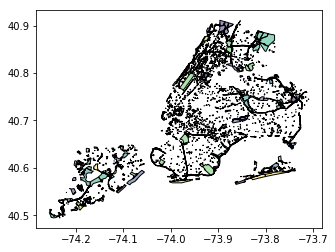

In [5]:
parks.plot()

In [6]:
parks.crs
park_proj = parks.to_crs({'init': u'epsg:2263'})
park_proj.crs

{'init': u'epsg:2263'}

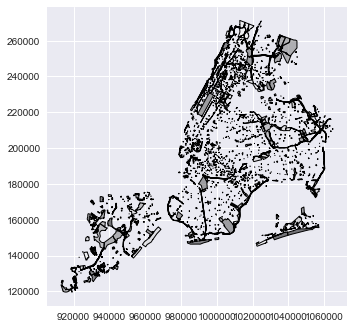

In [79]:
park_proj.plot()

In [25]:
from geopy.distance import vincenty

In [8]:
zipcodes = gpd.GeoDataFrame.from_file("NYC_shapefiles/ZIP_CODE_040114/ZIP_CODE_040114.shp")

## filter the zillow data for new york city  and add apartment type

In [9]:
dfstudio['apt_kind'] = 0
dfonebr['apt_kind'] = 1
dftwobr['apt_kind'] = 2

## combine all the data then filter for nyc

In [10]:
dfstudio.head(1)

,RegionName,City,State,Metro,CountyName,SizeRank,_2011_01,_2011_02,_2011_03,_2011_04,...,_2016_05,_2016_06,_2016_07,_2016_08,_2016_09,_2016_10,_2016_11,_2016_12,_2017_01,apt_kind
0,20009,Washington,DC,Washington,District of Columbia,19,NaN,NaN,NaN,NaN,...,1699.0,1760.0,1737.5,1850.0,1750.0,1735.0,1750.0,1762.5,1752.5,0


In [11]:
dfonebr.head(1)

,RegionName,City,State,Metro,CountyName,SizeRank,_2010_04,_2010_05,_2010_06,_2010_07,...,_2016_05,_2016_06,_2016_07,_2016_08,_2016_09,_2016_10,_2016_11,_2016_12,_2017_01,apt_kind
0,60601,Chicago,IL,Chicago,Cook,348,NaN,NaN,NaN,NaN,...,2093.0,2120.0,2156.0,2185.0,2085.0,2011.0,2017.5,1975.0,2000.0,1


In [12]:
dftwobr.head(1)

,RegionName,City,State,Metro,CountyName,SizeRank,_2010_02,_2010_03,_2010_04,_2010_05,...,_2016_05,_2016_06,_2016_07,_2016_08,_2016_09,_2016_10,_2016_11,_2016_12,_2017_01,apt_kind
0,60605,Chicago,IL,Chicago,Cook,383,NaN,NaN,NaN,NaN,...,2581.0,2570.0,2535.0,2600.0,2529.0,2500.0,2558.0,2600.0,2500.0,2


In [13]:
alldata = pd.concat([dfstudio, dfonebr, dftwobr])

In [14]:
alldata.head(2)

,City,CountyName,Metro,RegionName,SizeRank,State,_2010_02,_2010_03,_2010_04,_2010_05,...,_2016_05,_2016_06,_2016_07,_2016_08,_2016_09,_2016_10,_2016_11,_2016_12,_2017_01,apt_kind
0,Washington,District of Columbia,Washington,20009,19,DC,NaN,NaN,NaN,NaN,...,1699.0,1760.0,1737.5,1850.0,1750.0,1735.0,1750.0,1762.5,1752.5,0
1,San Diego,San Diego,San Diego,92101,37,CA,NaN,NaN,NaN,NaN,...,1755.0,1770.0,1768.0,1754.0,1812.5,1767.5,1730.0,1770.0,1835.0,0


In [15]:
zipcodes.head()

,AREA,BLDGZIP,COUNTY,CTY_FIPS,POPULATION,PO_NAME,SHAPE_AREA,SHAPE_LEN,STATE,ST_FIPS,URL,ZIPCODE,geometry
0,2.269930e+07,0,Queens,081,18681.0,Jamaica,0.0,0.0,NY,36,http://www.usps.com/,11436,"POLYGON ((1038098.251871482 188138.3800067157,..."
1,2.963100e+07,0,Kings,047,62426.0,Brooklyn,0.0,0.0,NY,36,http://www.usps.com/,11213,"POLYGON ((1001613.712964058 186926.4395172149,..."
2,4.197210e+07,0,Kings,047,83866.0,Brooklyn,0.0,0.0,NY,36,http://www.usps.com/,11212,"POLYGON ((1011174.275535807 183696.33770971, 1..."
3,2.369863e+07,0,Kings,047,56527.0,Brooklyn,0.0,0.0,NY,36,http://www.usps.com/,11225,"POLYGON ((995908.3654508889 183617.6128015518,..."
4,3.686880e+07,0,Kings,047,72280.0,Brooklyn,0.0,0.0,NY,36,http://www.usps.com/,11218,"POLYGON ((991997.1134308875 176307.4958601296,..."


## can we overlay zipcodes and parks and look at park area per zipcode

In [16]:
alldata.City.unique()

array([u'Washington', u'San Diego', u'Chicago', u'Seattle', u'New York',
       u'Saint Louis', u'Cambridge', u'Los Angeles', u'Austin',
       u'San Francisco', u'Denver', u'Arlington', u'Miami', u'Boston',
       u'Brookline', u'Philadelphia', u'Miami Beach', u'Atlanta',
       u'Union City', u'Houston', u'North Bethesda', u'Dallas', u'Orlando',
       u'Silver Spring', u'San Antonio', u'Jersey City', u'Newton',
       u'Plano', u'Fairfax', u'Grapevine', u'Irving', u'Hoboken',
       u'Richmond', u'Honolulu', u'Alexandria', u'Miramar', u'North Miami',
       u'Cedar Park', u'Waltham', u'Minneapolis', u'Woburn',
       u'Laguna Beach', u'Greenwood Village', u'Redmond', u'Kirkland',
       u'Mc Lean', u'Pflugerville', u'Providence', u'Charlotte',
       u'Sunnyvale', u'Foster City', u'La Mesa', u'Bloomington',
       u'Bethesda', u'Sandy Springs', u'Phoenix', u'Portland', u'Evanston',
       u'Fremont', u'San Jose', u'Omaha', u'Century Village',
       u'Newport News', u'Boulder', u'Ta

In [17]:
import seaborn as sns

/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


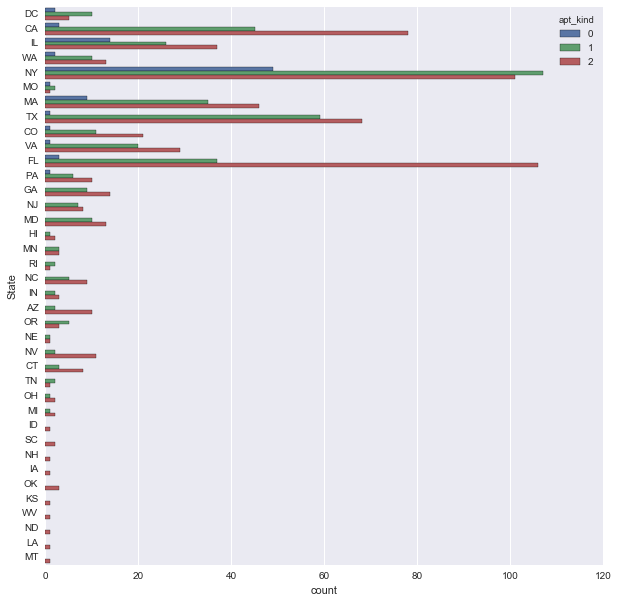

In [28]:
# look at count of apt type by state
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
sns.countplot(y="State", hue="apt_kind", data=alldata)


In [18]:
dfny = alldata[alldata['State']=='NY']

In [19]:
dfny.head()

,City,CountyName,Metro,RegionName,SizeRank,State,_2010_02,_2010_03,_2010_04,_2010_05,...,_2016_05,_2016_06,_2016_07,_2016_08,_2016_09,_2016_10,_2016_11,_2016_12,_2017_01,apt_kind
4,New York,Bronx,New York,10458,25,NY,NaN,NaN,NaN,NaN,...,1275.0,1275.0,1200.0,1297.5,1250.0,1300.0,1297.5,1275.0,1325.0,0
9,New York,Kings,New York,11205,56,NY,NaN,NaN,NaN,NaN,...,1995.0,1900.0,2000.0,2079.0,2079.0,2050.0,2150.0,2000.0,2000.0,0
12,New York,Kings,New York,11221,28,NY,NaN,NaN,NaN,NaN,...,1630.0,1700.0,1875.0,1772.5,1890.0,1895.0,1895.0,1695.0,1697.0,0
16,New York,Queens,New York,11102,64,NY,NaN,NaN,NaN,NaN,...,1800.0,1897.5,2100.0,1900.0,1775.0,1985.0,1900.0,1995.0,1750.0,0
18,New York,New York,New York,10038,76,NY,NaN,NaN,NaN,NaN,...,2872.5,2895.0,2750.0,2860.0,2750.0,2700.0,2733.0,2677.0,2632.5,0


In [31]:
zipcodes.crs

{u'datum': u'NAD83',
 u'lat_0': 40.16666666666666,
 u'lat_1': 40.66666666666666,
 u'lat_2': 41.03333333333333,
 u'lon_0': -74,
 u'no_defs': True,
 u'proj': u'lcc',
 u'units': u'us-ft',
 u'x_0': 300000,
 u'y_0': 0}

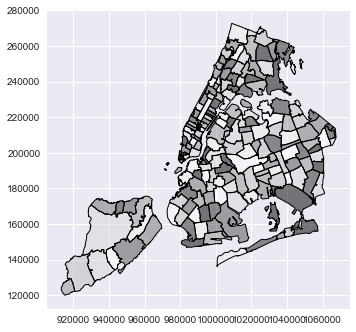

In [20]:
zipcodes.plot()

In [21]:
zipcodesproj = zipcodes.to_crs({'init': u'epsg:2263'})


In [22]:
zipcodesproj.crs


{'init': u'epsg:2263'}

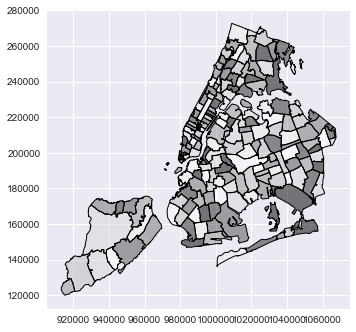

In [23]:
zipcodesproj.plot()

In [25]:
!pip install rtree

In [27]:
park_proj.head()

,acres,address,borough,communityb,councildis,geometry,gispropnum,location,nys_assemb,nys_senate,signname,typecatego,us_congres,waterfront,zipcode
0,20.34,40-50 VERNON BOULEVARD,Q,"401, 402",26,"(POLYGON ((998639.728754477 214672.8443260061,...",Q104,"Queensboro Bridge, 41 Rd., 40 Ave. bet. The Ea...",37,12,Queensbridge Park,Community Park,12,Yes,11101
1,6.1,200 CITY ISLAND AV,X,210,13,(POLYGON ((1044445.201119723 246876.5331993471...,X253,City Island Ave bet. Centre St. and Winter St.,82,34,Ambrosini Field,Recreation Field/Courts,14,Yes,10464
2,0.159,11528 Ocean Promenade,Q,414,32,(POLYGON ((1029700.335596384 149921.5630676614...,Q494,"Beach 116 St., Ocean Promenade",23,15,Flight 587 Memorial Park,Triangle/Plaza,5,Yes,11694
3,0.44,1086 EAST 180 STREET,X,206,15,(POLYGON ((1018493.260897728 246060.4564194266...,X245,E 180 St bet. the Bronx River and Devoe Av,87,33,River Garden,Garden,15,Yes,10460
4,4.893,31-30 VERNON BOULEVARD,Q,401,26,"(POLYGON ((1001911.54078038 219553.4448010043,...",Q465,Vernon Blvd. bet. Broadway and 30 Dr.,37,12,Socrates Sculpture Park,Neighborhood Park,12,Yes,11106


In [28]:
parkarea = park_proj.sort(['acres'], ascending = 0)


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [31]:
parkarea['acres'] = [float(x) for x in parkarea['acres']]

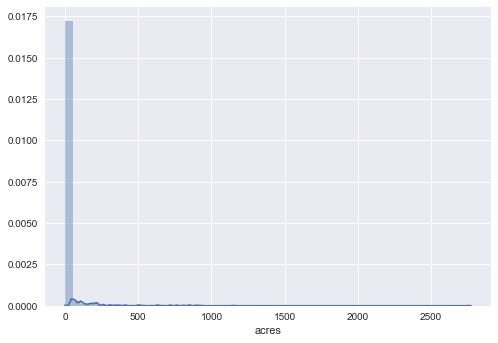

In [32]:
ax = sns.distplot(parkarea['acres'])

## filter by kind and size before doing the intersection

In [33]:
#are triangle/plazas small?
park_proj.typecatego.unique()

array([u'Community Park', u'Recreation Field/Courts', u'Triangle/Plaza',
       u'Garden', u'Neighborhood Park', u'Nature Area',
       u'Waterfront Facility', u'Historic House Park', u'Playground',
       u'Undeveloped', u'Buildings/Institutions', u'Flagship Park',
       u'Parkway', u'Jointly Operated Playground', u'Managed Sites',
       u'Lot', u'Strip', u'Cemetery', u'Mall'], dtype=object)

In [39]:
#look at size by type
typesize = park_proj[['typecatego','acres']]


In [40]:
typesize['acres'] = [float(x) for x in typesize['acres']]

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [43]:
typeg = typesize.groupby(['typecatego']).mean().reset_index()
typeg.columns = [['typecatego','mean_acres']]

In [50]:
typeg = typeg.sort(['acres'], ascending = 0)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


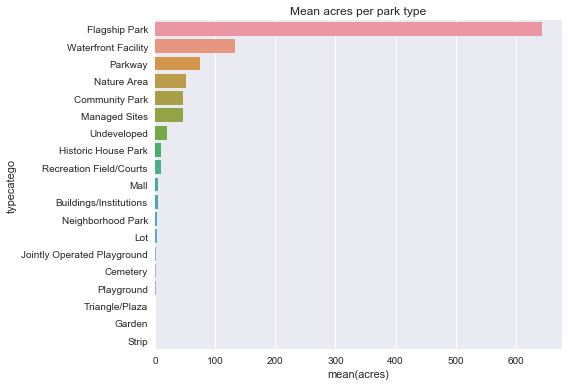

In [78]:
#mean acres for park type 
sns.plt.title('Mean acres per park type')
sns.barplot(x = 'acres', y='typecatego', data = typeg)
plt.tight_layout()
plt.savefig('mean_acres_park_type.png')

In [47]:
typecount = typesize.groupby(['typecatego']).size().reset_index()
typecount.columns = [['typecatego','count']]
typecount = typecount.sort(['count'],ascending = 0)
typecount.head()

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,typecatego,count
4,Garden,344
16,Triangle/Plaza,338
11,Neighborhood Park,270
6,Jointly Operated Playground,267
13,Playground,228


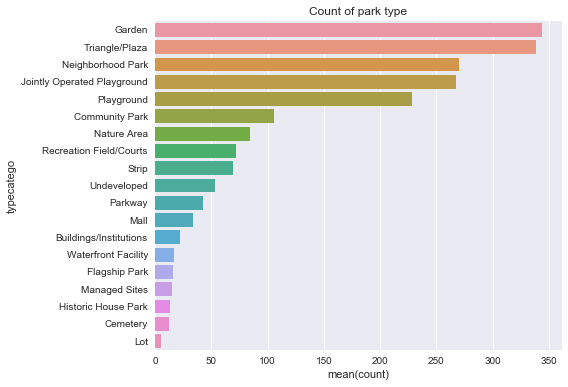

In [77]:
plt.title('Count of park type')
sns.barplot(x = 'count', y='typecatego', data = typecount)
plt.tight_layout()
plt.savefig('count_park_type.png')

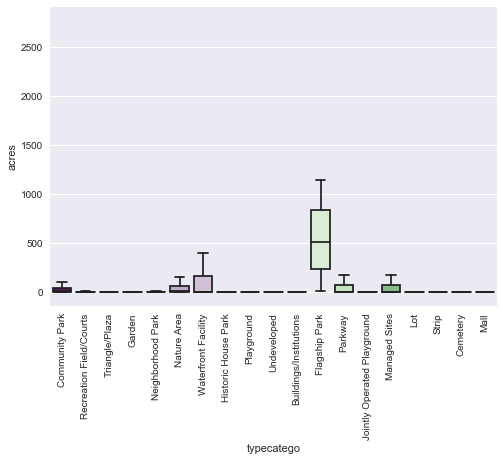

In [68]:
park_proj['acres'] = [float(x) for x in park_proj['acres']]
import matplotlib.pylab as plt
plt.xticks(rotation=90)
g = sns.boxplot(y="acres", x="typecatego",  data=park_proj, palette="PRGn")



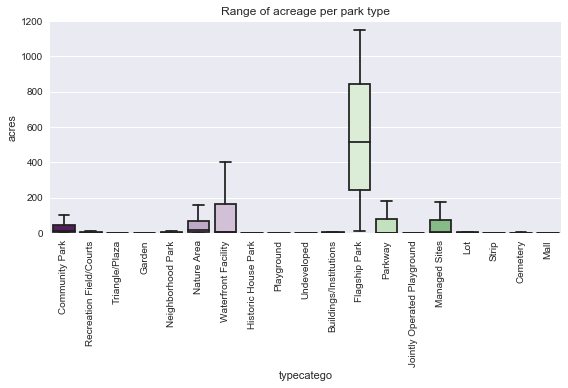

In [102]:
plt.title('Range of acreage per park type')
plt.xticks(rotation=90)
g = sns.boxplot(y="acres", x="typecatego",  data=park_proj, palette="PRGn")
plt.tight_layout()
g.set(ylim=(0, 1200))
plt.savefig("spread_acreage_parktype.png")

In [92]:
parkzip=  gpd.sjoin(park_proj, zipcodesproj, how = 'inner', op = 'intersects')

/usr/local/lib/python2.7/site-packages/numpy/lib/function_base.py:2652: RuntimeWarning: invalid value encountered in find_intersects (vectorized)
  outputs = ufunc(*inputs)


In [93]:
parkzip.head()

,acres,address,borough,communityb,councildis,geometry,gispropnum,location,nys_assemb,nys_senate,...,COUNTY,CTY_FIPS,POPULATION,PO_NAME,SHAPE_AREA,SHAPE_LEN,STATE,ST_FIPS,URL,ZIPCODE
0,20.340,40-50 VERNON BOULEVARD,Q,"401, 402",26,"(POLYGON ((998639.728754477 214672.8443260061,...",Q104,"Queensboro Bridge, 41 Rd., 40 Ave. bet. The Ea...",37,12,...,Queens,081,26254.0,Long Island City,0.0,0.0,NY,36,http://www.usps.com/,11101
30,10.000,52-10 CENTER BLVD,Q,402,26,(POLYGON ((995298.3666708043 209617.3311430861...,Q471,Center Blvd. bet. 50 Ave. and 54 Ave.,37,12,...,Queens,081,26254.0,Long Island City,0.0,0.0,NY,36,http://www.usps.com/,11101
327,0.218,35-01 STEINWAY STREET,Q,401,26,(POLYGON ((1005920.076070385 214300.3647560071...,Q296,35 Ave. bet. Steinway St. and 41 St.,30,12,...,Queens,081,26254.0,Long Island City,0.0,0.0,NY,36,http://www.usps.com/,11101
436,0.518,5-32 49 AVENUE,Q,402,26,"(POLYGON ((996891.7939301427 210136.233648592,...",Q045,49 Ave. bet. 5 St. and Vernon Blvd.,37,12,...,Queens,081,26254.0,Long Island City,0.0,0.0,NY,36,http://www.usps.com/,11101
908,2.524,11-01 45 ROAD,Q,402,26,"(POLYGON ((998721.944141224 211545.9647530107,...",Q141,"45 Ave., 45 Rd. bet. 11 St. and 21 St.",37,12,...,Queens,081,26254.0,Long Island City,0.0,0.0,NY,36,http://www.usps.com/,11101


In [94]:
parkzip.area

0       9.035791e+05
30      4.584202e+05
327     9.583411e+03
436     2.317846e+04
908     1.101002e+05
972     1.362355e+04
1180    1.110100e+04
1292    3.664077e+02
1528    4.520790e+03
1539    2.300043e+02
1549    2.747069e+03
1590    1.599961e+03
1596    1.126975e+02
1609    2.144308e+04
1726    6.049663e+03
1       2.638313e+05
1236    2.372252e+05
1866    6.304413e+03
2       6.547116e+03
776     5.114153e+04
785     5.270567e+04
1271    5.499173e+05
1272    3.619485e+04
1313    6.868113e+03
1405    3.067963e+04
1476    6.022760e+05
1550    2.559405e+04
1748    6.334656e+03
1749    1.560733e+06
1801    4.096279e+05
            ...     
1947    1.112582e+05
1306    2.788649e+05
1307    2.569570e+03
1308    6.047840e+04
1612    5.249361e+04
1358    6.775573e+04
1778    1.238731e+06
1803    9.551927e+05
1421    2.178619e+05
1767    2.799852e+03
1799    2.140270e+05
1863    6.725737e+02
1570    1.361664e+06
1731    8.484776e+06
1752    6.413722e+06
1577    1.217893e+03
1678    2.330

In [104]:
parkzip['area'] = park_proj.area

In [105]:
parkzip.head()

,acres,address,borough,communityb,councildis,geometry,gispropnum,location,nys_assemb,nys_senate,...,CTY_FIPS,POPULATION,PO_NAME,SHAPE_AREA,SHAPE_LEN,STATE,ST_FIPS,URL,ZIPCODE,area
0,20.340,40-50 VERNON BOULEVARD,Q,"401, 402",26,"(POLYGON ((998639.728754477 214672.8443260061,...",Q104,"Queensboro Bridge, 41 Rd., 40 Ave. bet. The Ea...",37,12,...,081,26254.0,Long Island City,0.0,0.0,NY,36,http://www.usps.com/,11101,903579.125063
30,10.000,52-10 CENTER BLVD,Q,402,26,(POLYGON ((995298.3666708043 209617.3311430861...,Q471,Center Blvd. bet. 50 Ave. and 54 Ave.,37,12,...,081,26254.0,Long Island City,0.0,0.0,NY,36,http://www.usps.com/,11101,458420.155478
327,0.218,35-01 STEINWAY STREET,Q,401,26,(POLYGON ((1005920.076070385 214300.3647560071...,Q296,35 Ave. bet. Steinway St. and 41 St.,30,12,...,081,26254.0,Long Island City,0.0,0.0,NY,36,http://www.usps.com/,11101,9583.410756
436,0.518,5-32 49 AVENUE,Q,402,26,"(POLYGON ((996891.7939301427 210136.233648592,...",Q045,49 Ave. bet. 5 St. and Vernon Blvd.,37,12,...,081,26254.0,Long Island City,0.0,0.0,NY,36,http://www.usps.com/,11101,23178.455097
908,2.524,11-01 45 ROAD,Q,402,26,"(POLYGON ((998721.944141224 211545.9647530107,...",Q141,"45 Ave., 45 Rd. bet. 11 St. and 21 St.",37,12,...,081,26254.0,Long Island City,0.0,0.0,NY,36,http://www.usps.com/,11101,110100.189845


In [114]:
parkzip.ZIPCODE.unique()

array([u'11101', u'10464', u'11694', u'10460', u'11106', u'11224',
       u'11222', u'11231', u'10029', u'10302', u'10306', u'10305',
       u'11692', u'11691', u'10309', u'10304', u'10301', u'10310',
       u'11214', u'10307', u'10028', u'11235', u'10023', u'10069',
       u'11249', u'11357', u'10459', u'11105', u'10040', u'10462',
       u'10458', u'10467', u'11693', u'11211', u'10022', u'11233',
       u'10036', u'10037', u'10461', u'10002', u'10035', u'10469',
       u'11201', u'10009', u'11221', u'10003', u'10012', u'10014',
       u'11205', u'10128', u'10065', u'10016', u'10017', u'11369',
       u'10466', u'10454', u'10455', u'10451', u'10033', u'10010',
       u'10039', u'11206', u'10025', u'10026', u'10456', u'10032',
       u'10027', u'10031', u'10011', u'10457', u'10024', u'10013',
       u'10007', u'11373', u'10021', u'10075', u'10452', u'10001',
       u'10034', u'10453', u'10019', u'10468', u'11354', u'10463',
       u'10470', u'10471', u'11416', u'11215', u'11234', u'112

In [116]:
zipcodesproj['area'] = zipcodesproj.area

In [117]:
zipshort = zipcodesproj[['area','ZIPCODE']]
zipshort.columns = [['ziparea','ZIPCODE']]

In [119]:
parkzipshort = parkzip[['area','ZIPCODE']]
parkzipshort.columns = [['parkoverlayarea','ZIPCODE']]

In [128]:
parkzipshort['parkoverlayarea'] = [float(x) for x in parkzipshort['parkoverlayarea']]

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [129]:
parkzipg = parkzipshort.groubpy(['ZIPCODE']).sum().reset_index()
parkzipg

AttributeError: 'DataFrame' object has no attribute 'groubpy'

In [120]:
joined = zipshort.merge(parkzipshort, how = 'outer', on = ['ZIPCODE'])

In [121]:
joined.head()

,ziparea,ZIPCODE,parkoverlayarea
0,2.269930e+07,11436,278864.949564
1,2.269930e+07,11436,2569.569535
2,2.269930e+07,11436,60478.400009
3,2.269930e+07,11436,52493.607616
4,2.963100e+07,11213,61176.266886


In [122]:
joined['percentpark'] = joined['parkoverlayarea']/joined['ziparea']

In [123]:
joined.head()

,ziparea,ZIPCODE,parkoverlayarea,percentpark
0,2.269930e+07,11436,278864.949564,0.012285
1,2.269930e+07,11436,2569.569535,0.000113
2,2.269930e+07,11436,60478.400009,0.002664
3,2.269930e+07,11436,52493.607616,0.002313
4,2.963100e+07,11213,61176.266886,0.002065


In [131]:
joinedshort = joined[['ZIPCODE', 'parkoverlayarea']]

In [132]:
joinedshortg = joinedshort.groupby(['ZIPCODE']).sum().reset_index()

In [133]:
joinedshortg.head()

,ZIPCODE,parkoverlayarea
0,00083,3.656768e+07
1,10001,5.416495e+05
2,10002,3.813254e+06
3,10003,5.789359e+05
4,10004,4.168394e+06


In [134]:
joined = joinedshortg.merge(zipshort,on = ['ZIPCODE'], how = 'left')

In [135]:
joined.head()

,ZIPCODE,parkoverlayarea,ziparea
0,00083,3.656768e+07,3.830099e+07
1,10001,5.416495e+05,1.779494e+07
2,10002,3.813254e+06,2.628013e+07
3,10003,5.789359e+05,1.553838e+07
4,10004,4.168394e+06,4.002521e+06


In [136]:
joined['percentpark'] = joined['parkoverlayarea']/joined['ziparea']

In [137]:
joined.head()

,ZIPCODE,parkoverlayarea,ziparea,percentpark
0,00083,3.656768e+07,3.830099e+07,0.954745
1,10001,5.416495e+05,1.779494e+07,0.030438
2,10002,3.813254e+06,2.628013e+07,0.145100
3,10003,5.789359e+05,1.553838e+07,0.037258
4,10004,4.168394e+06,4.002521e+06,1.041442


In [138]:
joined.sort(['percentpark'], ascending = 0)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,ZIPCODE,parkoverlayarea,ziparea,percentpark
156,11096,1.282744e+07,1.119738e+05,114.557556
138,10464,3.515745e+08,4.512530e+06,77.910723
258,11693,8.008786e+07,1.527599e+06,52.427279
139,10464,3.515745e+08,1.158795e+07,30.339654
260,11693,8.008786e+07,3.497516e+06,22.898498
155,11096,1.282744e+07,1.512446e+06,8.481256
193,11231,5.765990e+06,7.019794e+05,8.213902
259,11693,8.008786e+07,1.227092e+07,6.526641
7,10004,4.168394e+06,6.707080e+05,6.214916
136,10463,1.820194e+07,3.119702e+06,5.834511


In [95]:
#does the park json show parks perfectly in a single zip code? this would be weird
park_proj.head()

,acres,address,borough,communityb,councildis,geometry,gispropnum,location,nys_assemb,nys_senate,signname,typecatego,us_congres,waterfront,zipcode
0,20.340,40-50 VERNON BOULEVARD,Q,"401, 402",26,"(POLYGON ((998639.728754477 214672.8443260061,...",Q104,"Queensboro Bridge, 41 Rd., 40 Ave. bet. The Ea...",37,12,Queensbridge Park,Community Park,12,Yes,11101
1,6.100,200 CITY ISLAND AV,X,210,13,(POLYGON ((1044445.201119723 246876.5331993471...,X253,City Island Ave bet. Centre St. and Winter St.,82,34,Ambrosini Field,Recreation Field/Courts,14,Yes,10464
2,0.159,11528 Ocean Promenade,Q,414,32,(POLYGON ((1029700.335596384 149921.5630676614...,Q494,"Beach 116 St., Ocean Promenade",23,15,Flight 587 Memorial Park,Triangle/Plaza,5,Yes,11694
3,0.440,1086 EAST 180 STREET,X,206,15,(POLYGON ((1018493.260897728 246060.4564194266...,X245,E 180 St bet. the Bronx River and Devoe Av,87,33,River Garden,Garden,15,Yes,10460
4,4.893,31-30 VERNON BOULEVARD,Q,401,26,"(POLYGON ((1001911.54078038 219553.4448010043,...",Q465,Vernon Blvd. bet. Broadway and 30 Dr.,37,12,Socrates Sculpture Park,Neighborhood Park,12,Yes,11106


In [96]:
len(park_proj), len(park_proj.drop_duplicates())

TypeError: type object argument after * must be a sequence, not itertools.imap

In [ ]:
intersect = gpd.overlay(zipcodesproj,park_proj, how = 'intersection' )

In [107]:
parkacres = park_proj[['acres','zipcode']]

In [108]:
parksum = parkacres.groupby(['zipcode']).sum().reset_index()
parksum.head()

,zipcode,acres
0,10001,5.239
1,"10001, 10011, 10014",6.730
2,"10001, 10018",2.148
3,10002,87.555
4,10003,13.488


In [113]:
park_proj.zipcode.tolist()

[u'11101',
 u'10464',
 u'11694',
 u'10460',
 u'11106',
 u'11224',
 u'11222',
 u'11224',
 u'11231',
 u'10029',
 u'10302',
 u'10305, 10306',
 u'11691, 11692',
 u'10309',
 u'10304, 10305',
 u'10301, 10310',
 u'11214',
 u'10307',
 u'10028',
 u'11235',
 u'11224',
 u'11692',
 u'11214',
 u'10019, 10023',
 u'11224',
 u'11224',
 u'11211',
 u'11357',
 u'10459, 10472',
 u'11105',
 u'11101',
 u'10040',
 u'10307, 10309',
 u'10458, 10460, 10462, 10467',
 u'11693',
 u'11211',
 u'11222',
 u'10022',
 u'11233',
 u'10029',
 u'10036',
 u'10037',
 u'10461',
 u'10002',
 u'10035',
 u'10002',
 u'10469',
 u'10462',
 u'11106',
 u'10467',
 u'10469',
 u'10469',
 u'11211',
 u'11201',
 u'11211',
 u'11211',
 u'11691',
 u'10009',
 u'10009',
 u'11211',
 u'11211',
 u'11211',
 u'11211',
 u'10022',
 u'11221',
 u'10002',
 u'10003',
 u'10012',
 u'10012',
 u'10014',
 u'10009',
 u'10009',
 u'10012',
 u'11205',
 u'10029, 10128',
 u'10128',
 u'10022',
 u'10065',
 u'11692',
 u'10003',
 u'10016',
 u'10017',
 u'11369',
 u'10466',

In [24]:
gpd.__version__

u'0.2.1'

In [80]:
dfny.head()

,City,CountyName,Metro,RegionName,SizeRank,State,_2010_02,_2010_03,_2010_04,_2010_05,...,_2016_05,_2016_06,_2016_07,_2016_08,_2016_09,_2016_10,_2016_11,_2016_12,_2017_01,apt_kind
4,New York,Bronx,New York,10458,25,NY,NaN,NaN,NaN,NaN,...,1275.0,1275.0,1200.0,1297.5,1250.0,1300.0,1297.5,1275.0,1325.0,0
9,New York,Kings,New York,11205,56,NY,NaN,NaN,NaN,NaN,...,1995.0,1900.0,2000.0,2079.0,2079.0,2050.0,2150.0,2000.0,2000.0,0
12,New York,Kings,New York,11221,28,NY,NaN,NaN,NaN,NaN,...,1630.0,1700.0,1875.0,1772.5,1890.0,1895.0,1895.0,1695.0,1697.0,0
16,New York,Queens,New York,11102,64,NY,NaN,NaN,NaN,NaN,...,1800.0,1897.5,2100.0,1900.0,1775.0,1985.0,1900.0,1995.0,1750.0,0
18,New York,New York,New York,10038,76,NY,NaN,NaN,NaN,NaN,...,2872.5,2895.0,2750.0,2860.0,2750.0,2700.0,2733.0,2677.0,2632.5,0


In [83]:
project = "spheric-crow-161317"
sample_query = "SELECT * FROM `smart_cities_data.median_rents_neighborhood_studio` "

df = read_gbq(query=sample_query, project_id=project, dialect='standard')


Traceback (most recent call last):
  File "/usr/local/lib/python2.7/site-packages/googleapiclient/discovery_cache/__init__.py", line 41, in autodetect
    from . import file_cache
  File "/usr/local/lib/python2.7/site-packages/googleapiclient/discovery_cache/file_cache.py", line 41, in <module>
    'file_cache is unavailable when using oauth2client >= 4.0.0')
ImportError: file_cache is unavailable when using oauth2client >= 4.0.0


Requesting query... ok.
Query running...
Query done.
Processed: 42.1 kb

Retrieving results...
Got 81 rows.

Total time taken 2.66 s.
Finished at 2017-03-25 16:08:03.


In [84]:
df.head()

,RegionName,City,State,Metro,CountyName,SizeRank,_2010_10,_2010_11,_2010_12,_2011_01,...,_2016_04,_2016_05,_2016_06,_2016_07,_2016_08,_2016_09,_2016_10,_2016_11,_2016_12,_2017_01
0,Downtown,San Francisco,CA,San Francisco,San Francisco,52,NaN,NaN,NaN,NaN,...,2197.5,2195.0,2200.0,2400.0,2250.0,1995.0,2195.0,2145.0,2045.0,2197.5
1,Westlake,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,14,NaN,NaN,NaN,NaN,...,1050.0,1100.0,1050.0,1062.5,1150.0,1112.5,1097.5,1137.5,1150.0,1150.0
2,Downtown,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,32,NaN,NaN,NaN,NaN,...,2070.0,2010.0,2015.0,1953.0,2048.0,2088.5,2070.0,1985.0,2032.5,2047.5
3,Koreatown,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,13,NaN,NaN,NaN,NaN,...,1197.5,1162.5,1195.0,1195.0,1212.5,1200.0,1199.0,1299.0,1200.0,1250.0
4,Dupont Circle,Washington,DC,Washington,District of Columbia,62,NaN,NaN,NaN,NaN,...,2040.0,1880.0,1915.0,1935.0,2069.0,1945.0,1940.0,1950.0,1915.0,1883.0


In [85]:
dfnynh = df[df['State']=='NY']
dfnynh.head()

,RegionName,City,State,Metro,CountyName,SizeRank,_2010_10,_2010_11,_2010_12,_2011_01,...,_2016_04,_2016_05,_2016_06,_2016_07,_2016_08,_2016_09,_2016_10,_2016_11,_2016_12,_2017_01
37,East Harlem,New York,NY,New York,New York,11,NaN,NaN,NaN,NaN,...,2650.0,2695.0,2650.0,2650.0,2695.0,2672.5,2700.0,2700.0,2650.0,2700.0
38,Bedford Stuyvesant,New York,NY,New York,Kings,6,NaN,NaN,NaN,NaN,...,1630.0,1700.0,1750.0,1800.0,1725.0,1800.0,1899.5,1895.0,1662.5,1750.0
39,Crown Heights,New York,NY,New York,Kings,8,NaN,NaN,NaN,NaN,...,1600.0,1795.0,1699.0,1700.0,1695.0,1650.0,1700.0,1753.0,1650.0,1850.0
40,Forest Hills,New York,NY,New York,Queens,18,NaN,NaN,NaN,NaN,...,1525.0,1504.0,1550.0,1650.0,1575.0,1600.0,1550.0,1550.0,1525.0,1550.0
41,Williamsburg,New York,NY,New York,Kings,5,NaN,NaN,NaN,NaN,...,2700.0,2600.0,2645.0,2715.0,2600.0,2600.0,2748.0,2600.0,2600.0,2900.0


In [86]:
dfnynh.RegionName.unique()

array([u'East Harlem', u'Bedford Stuyvesant', u'Crown Heights',
       u'Forest Hills', u'Williamsburg', u'Flushing', u'Hunters Point',
       u'Downtown', u'Flatbush', u'Murray Hill', u'Upper West Side',
       u'Tudor City', u'Turtle Bay', u'East Village', u'Brooklyn Heights',
       u'Fort Greene', u'West Village', u'Jackson Heights', u'Elmhurst',
       u'Columbus Circle', u'Lower East Side', u'Washington Heights',
       u'Clinton', u'Chelsea', u'Greenwich Village', u'Astoria',
       u'Tribeca', u'Jamaica', u'Garment District', u'Financial District',
       u'Flatiron District', u'Clinton Hill', u'Sunnyside',
       u'Sutton Place', u'Rego Park', u'Harlem', u'Upper East Side',
       u'Battery Park', u'Fort Hamilton', u'Gramercy', u'Midtown'], dtype=object)

In [87]:
len(dfnynh.RegionName.unique())

41

In [88]:
dfny.RegionName.unique()

array([10458, 11205, 11221, 11102, 10038, 11235, 10018, 11355, 11109,
       10029, 10001, 10069, 11216, 11104, 11432, 10036, 10013, 11226,
       11238, 11106, 11375, 11374, 11211, 11101, 11209, 10021, 10005,
       11372, 10006, 10014, 10022, 10024, 10010, 11373, 10128, 10003,
       10075, 10019, 11201, 10017, 10016, 10023, 10009, 10002, 10025,
       10028, 10012, 10011, 10065, 10007, 10282, 10026, 11212, 11415,
       11377, 11105, 10004, 10468, 10467, 10452, 11418, 11204, 11206,
       11249, 11358, 10466, 11231, 10805, 10472, 11367, 11222, 11237,
       10701, 11228, 10032, 10462, 10461, 11217, 10040, 11354, 11220,
       10033, 11232, 11435, 11213, 11225, 10027, 11215, 11561, 10031,
       10280, 10453, 11368, 10463, 11223, 11230, 10457, 11210, 11214,
       11203, 11233, 10030, 10037, 11103, 11218, 10035, 11229, 10034,
       12065, 11234, 12180, 11361, 11236, 11385, 11207])

In [90]:
len(dfny)

257

## get rid of small parks and start over using geopandas overlay


In [140]:
park_proj = park_proj.sort(['acres'], ascending = 0)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [141]:
park_proj.head()

,acres,address,borough,communityb,councildis,geometry,gispropnum,location,nys_assemb,nys_senate,signname,typecatego,us_congres,waterfront,zipcode
1841,2771.747,None,X,"210, 212","12,13","(POLYGON ((1035312.05600022 262851.032418263, ...",X039,"Hutchinson River, Long Island Sound bet. Bronc...",None,None,Pelham Bay Park,Flagship Park,None,Yes,"10461, 10464, 10464, 10465, 10469, 10475, 10803"
1828,1146.430,3545 JEROME AVENUE,X,"207, 208, 212",11,(POLYGON ((1014952.519947719 267799.2797395985...,X092,"NYC - Westchester County Line, Van Cortlandt P...",81,34,Van Cortlandt Park,Flagship Park,16,No,"10467, 10470, 10471, 10705, 10705"
1435,920.426,None,R,"502, 503","50,51",(POLYGON ((936985.9166948968 143792.0457991689...,R017,"Victory Blvd., W. Shore Exwy., Richmond Ave. b...",63,24,Freshkills Park,Undeveloped,11,Yes,"10312, 10314"
1912,897.690,None,Q,"403, 404, 406, 407, 408","19,20,21,24",(POLYGON ((1032238.971595229 200857.0504353404...,Q099,"Grand Central Pkwy., Whitestone Exwy. bet. 111...","35, 25, 40","13, 15, 16",Flushing Meadows Corona Park,Flagship Park,"6, 14",Yes,"11354, 11355, 11367, 11368"
464,843.970,1001 RICHMOND HILL ROAD,R,"502, 503","50,51",(POLYGON ((943611.4080370538 148424.3301697549...,R013,"Forest Hill Rd., London Rd., Rockland Ave., Ar...",63,24,LaTourette Park & Golf Course,Flagship Park,11,No,"10306, 10314"


In [142]:
len(park_proj)

2008

In [143]:
#take top 500 parks
top500 = park_proj[:500]

In [146]:
top500.tail()

,acres,address,borough,communityb,councildis,geometry,gispropnum,location,nys_assemb,nys_senate,signname,typecatego,us_congres,waterfront,zipcode
545,2.087,2675 NOSTRAND AVENUE,B,315,48,(POLYGON ((1000927.304887961 154035.6312830859...,B239,Ave. Z between Nostrand Ave. and E. 29 St.,41,22,Sheepshead Playground,Jointly Operated Playground,9,No,11235
448,2.075,880 LAFAYETTE AVENUE,X,209,18,(POLYGON ((1022271.753012645 239364.4386435144...,X204,Story Ave. bet. Taylor Ave. and Thieriot Ave.,85,32,Story Playground,Jointly Operated Playground,15,No,10473
1022,2.067,None,M,109,7,(POLYGON ((994725.1135522294 235256.2883952635...,M087,"Riverside Dr., Claremont Ave. To W. 122 St.",70,30,Sakura Park,Neighborhood Park,13,No,10027
1688,2.066,None,Q,411,23,(POLYGON ((1053153.792626383 213799.1666114254...,Q388,230 St. bet. 57 Ave. and 57 Rd.,26,11,Linnaeus Park,Recreation Field/Courts,6,No,11364
1404,2.064,None,B,"316, 304","37,41",(POLYGON ((1005768.507803977 182809.2381058417...,B030,Eastern Pkwy. bet. Ralph Ave. and Bushwick Ave.,55,"20, 19, 18",Eastern Parkway Extension,Mall,"9, 8",No,"11207, 11233"


In [147]:
intersect = gpd.overlay(zipcodesproj, top500, how = 'intersection' )

Ring Self-intersection at or near point 1040135.4065897184 258809.69174767172
Ring Self-intersection at or near point 1035524.9066243942 249020.90883183986
Ring Self-intersection at or near point 1015202.8603263077 263437.72415827191
Ring Self-intersection at or near point 1024092.7969427273 178946.17955901165
Ring Self-intersection at or near point 1028849.3264716436 245229.30224184168
Ring Self-intersection at or near point 1002496.1675638878 236140.65244016945
Ring Self-intersection at or near point 984206.48990447598 156582.89718592321
Ring Self-intersection at or near point 1005789.0067787194 182819.77023700284


KeyboardInterrupt: 

## new strategy, park or not? is there any difference?

In [148]:
park_proj.head()

,acres,address,borough,communityb,councildis,geometry,gispropnum,location,nys_assemb,nys_senate,signname,typecatego,us_congres,waterfront,zipcode
1841,2771.747,None,X,"210, 212","12,13","(POLYGON ((1035312.05600022 262851.032418263, ...",X039,"Hutchinson River, Long Island Sound bet. Bronc...",None,None,Pelham Bay Park,Flagship Park,None,Yes,"10461, 10464, 10464, 10465, 10469, 10475, 10803"
1828,1146.430,3545 JEROME AVENUE,X,"207, 208, 212",11,(POLYGON ((1014952.519947719 267799.2797395985...,X092,"NYC - Westchester County Line, Van Cortlandt P...",81,34,Van Cortlandt Park,Flagship Park,16,No,"10467, 10470, 10471, 10705, 10705"
1435,920.426,None,R,"502, 503","50,51",(POLYGON ((936985.9166948968 143792.0457991689...,R017,"Victory Blvd., W. Shore Exwy., Richmond Ave. b...",63,24,Freshkills Park,Undeveloped,11,Yes,"10312, 10314"
1912,897.690,None,Q,"403, 404, 406, 407, 408","19,20,21,24",(POLYGON ((1032238.971595229 200857.0504353404...,Q099,"Grand Central Pkwy., Whitestone Exwy. bet. 111...","35, 25, 40","13, 15, 16",Flushing Meadows Corona Park,Flagship Park,"6, 14",Yes,"11354, 11355, 11367, 11368"
464,843.970,1001 RICHMOND HILL ROAD,R,"502, 503","50,51",(POLYGON ((943611.4080370538 148424.3301697549...,R013,"Forest Hill Rd., London Rd., Rockland Ave., Ar...",63,24,LaTourette Park & Golf Course,Flagship Park,11,No,"10306, 10314"


In [149]:
zipcodesproj.head()

,AREA,BLDGZIP,COUNTY,CTY_FIPS,POPULATION,PO_NAME,SHAPE_AREA,SHAPE_LEN,STATE,ST_FIPS,URL,ZIPCODE,geometry,area
0,2.269930e+07,0,Queens,081,18681.0,Jamaica,0.0,0.0,NY,36,http://www.usps.com/,11436,"POLYGON ((1038098.251871481 188138.3800188016,...",2.269930e+07
1,2.963100e+07,0,Kings,047,62426.0,Brooklyn,0.0,0.0,NY,36,http://www.usps.com/,11213,"POLYGON ((1001613.71296406 186926.4395293126, ...",2.963100e+07
2,4.197210e+07,0,Kings,047,83866.0,Brooklyn,0.0,0.0,NY,36,http://www.usps.com/,11212,"POLYGON ((1011174.275535807 183696.3377217973,...",4.197210e+07
3,2.369863e+07,0,Kings,047,56527.0,Brooklyn,0.0,0.0,NY,36,http://www.usps.com/,11225,"POLYGON ((995908.3654508907 183617.6128136468,...",2.369863e+07
4,3.686880e+07,0,Kings,047,72280.0,Brooklyn,0.0,0.0,NY,36,http://www.usps.com/,11218,"POLYGON ((991997.1134308886 176307.4958722248,...",3.686880e+07


In [151]:
parkzip=  gpd.sjoin(park_proj, zipcodesproj, how = 'left', op = 'intersects')

In [153]:
parkzip.tail()

,acres,address,borough,communityb,councildis,geometry,gispropnum,location,nys_assemb,nys_senate,...,CTY_FIPS,POPULATION,PO_NAME,SHAPE_AREA,SHAPE_LEN,STATE,ST_FIPS,URL,ZIPCODE,area
2003,0.041,601 WARWICK STREET,B,305,42,(POLYGON ((1016368.668690222 182911.6752369118...,B581,Warwick St. bet. Blake Ave. and Dumont Ave.,60,19,...,047,93556.0,Brooklyn,0.0,0.0,NY,36,http://www.usps.com/,11207,7.396626e+07
2004,0.058,48 LEFFERTS PLACE,B,302,35,"(POLYGON ((994840.251117212 187546.6997595018,...",B582,Lefferts Pl. bet. Grand Ave. and St. James Pl.,57,25,...,047,46664.0,Brooklyn,0.0,0.0,NY,36,http://www.usps.com/,11238,2.942942e+07
2005,0.053,375 SOUTH 5 STREET,B,301,34,(POLYGON ((997077.9205263874 197176.6522843479...,B583,Hooper St. bet. S 5 St. and S 4 St.,53,18,...,047,60861.0,Brooklyn,0.0,0.0,NY,36,http://www.usps.com/,11211,4.047088e+07
2006,0.038,9 MOFFAT STREET,B,None,304,(POLYGON ((1008984.378996892 188361.0465559989...,B584,Moffat St. bet. Chauncey St. and Bushwick Ave.,55,18,...,047,93556.0,Brooklyn,0.0,0.0,NY,36,http://www.usps.com/,11207,7.396626e+07
2007,2.577,None,R,501,49,"(POLYGON ((964117.070109635 168002.1604365888,...",R170,Front St. bet. Wave St. and Water St.,61,23,...,085,41502.0,Staten Island,0.0,0.0,NY,36,http://www.usps.com/,10304,9.822668e+07


In [156]:
parkzip[parkzip['area'].isnull()]

,acres,address,borough,communityb,councildis,geometry,gispropnum,location,nys_assemb,nys_senate,...,CTY_FIPS,POPULATION,PO_NAME,SHAPE_AREA,SHAPE_LEN,STATE,ST_FIPS,URL,ZIPCODE,area
961,21.109366,None,Q,202,17,"(POLYGON ((1013299.99963072 229436.000167095, ...",X309,East River,85,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1261,8.639000,None,M,108,5,(POLYGON ((1001407.714360224 223760.1755607605...,M209,East River Opp E. 96 St.,76,29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1508,107.514000,None,R,502,50,(POLYGON ((929005.2341654752 158247.8010083325...,R122,Pralls River and Arthur Kill,63,24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1516,34.689000,None,R,501,49,(POLYGON ((941202.9528802185 173081.1919451694...,R128,Kill Van Kull and Newark Bay,61,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002,30.395000,None,X,202,17,(POLYGON ((1012898.825892389 230776.1513581872...,X308,East River,85,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [158]:
ziplist = park_proj.zipcode.unique()

In [162]:
allzips = []
for i in ziplist:
    if len(i) > 1:
        for j in i:
            if j not in allzips:
                allzips.append(j)
    else:
        if i not in allzips:
            allzips.append(i)

In [164]:
ziplist

array([u'10461, 10464, 10464, 10465, 10469, 10475, 10803',
       u'10467, 10470, 10471, 10705, 10705', u'10312, 10314',
       u'11354, 11355, 11367, 11368', u'10306, 10314',
       u'10023, 10024, 10025', u'11229, 11234, 11235',
       u'11208, 11209, 11214, 11223, 11228, 11234, 11235, 1',
       u'10458, 10460, 10462, 10467', u'10305, 10306',
       u'11361, 11362, 11363, 11364, 11426', u'11215',
       u'11375, 11385, 11415, 11421', u'11691, 11692', u'10465',
       u'11224, 11235', u'11692, 11693, 11694', u'11364, 11423, 11427',
       u'10301, 10304, 10306, 10309, 10312, 10314',
       u'11003, 11357, 11359, 11360, 11361, 11362, 11364, 1', u'10306',
       u'10309, 10312', u'10307, 10309', u'10035',
       u'11103, 11367, 11368, 11369, 11370, 11371, 11375', u'11365',
       u'10461, 10462, 10465, 10469, 10475', u'10312', u'11209, 11228',
       u'10314', u'10301',
       u'10460, 10466, 10467, 10470, 10472, 10473, 10704', u'10473',
       u'11413, 11414, 11420, 11430, 11434', u'1

In [165]:
dfny.head()

,City,CountyName,Metro,RegionName,SizeRank,State,_2010_02,_2010_03,_2010_04,_2010_05,...,_2016_05,_2016_06,_2016_07,_2016_08,_2016_09,_2016_10,_2016_11,_2016_12,_2017_01,apt_kind
4,New York,Bronx,New York,10458,25,NY,NaN,NaN,NaN,NaN,...,1275.0,1275.0,1200.0,1297.5,1250.0,1300.0,1297.5,1275.0,1325.0,0
9,New York,Kings,New York,11205,56,NY,NaN,NaN,NaN,NaN,...,1995.0,1900.0,2000.0,2079.0,2079.0,2050.0,2150.0,2000.0,2000.0,0
12,New York,Kings,New York,11221,28,NY,NaN,NaN,NaN,NaN,...,1630.0,1700.0,1875.0,1772.5,1890.0,1895.0,1895.0,1695.0,1697.0,0
16,New York,Queens,New York,11102,64,NY,NaN,NaN,NaN,NaN,...,1800.0,1897.5,2100.0,1900.0,1775.0,1985.0,1900.0,1995.0,1750.0,0
18,New York,New York,New York,10038,76,NY,NaN,NaN,NaN,NaN,...,2872.5,2895.0,2750.0,2860.0,2750.0,2700.0,2733.0,2677.0,2632.5,0


In [166]:
def haspark(x):
    if i in ziplist:
        return 1
    else:
        return 0
dfny['haspark'] = [haspark(x) for x in dfny['RegionName']]

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [167]:
dfny.head()

,City,CountyName,Metro,RegionName,SizeRank,State,_2010_02,_2010_03,_2010_04,_2010_05,...,_2016_06,_2016_07,_2016_08,_2016_09,_2016_10,_2016_11,_2016_12,_2017_01,apt_kind,haspark
4,New York,Bronx,New York,10458,25,NY,NaN,NaN,NaN,NaN,...,1275.0,1200.0,1297.5,1250.0,1300.0,1297.5,1275.0,1325.0,0,1
9,New York,Kings,New York,11205,56,NY,NaN,NaN,NaN,NaN,...,1900.0,2000.0,2079.0,2079.0,2050.0,2150.0,2000.0,2000.0,0,1
12,New York,Kings,New York,11221,28,NY,NaN,NaN,NaN,NaN,...,1700.0,1875.0,1772.5,1890.0,1895.0,1895.0,1695.0,1697.0,0,1
16,New York,Queens,New York,11102,64,NY,NaN,NaN,NaN,NaN,...,1897.5,2100.0,1900.0,1775.0,1985.0,1900.0,1995.0,1750.0,0,1
18,New York,New York,New York,10038,76,NY,NaN,NaN,NaN,NaN,...,2895.0,2750.0,2860.0,2750.0,2700.0,2733.0,2677.0,2632.5,0,1


In [168]:
dfny[dfny['haspark']==0]

,City,CountyName,Metro,RegionName,SizeRank,State,_2010_02,_2010_03,_2010_04,_2010_05,...,_2016_06,_2016_07,_2016_08,_2016_09,_2016_10,_2016_11,_2016_12,_2017_01,apt_kind,haspark


In [169]:
dfny.head()

,City,CountyName,Metro,RegionName,SizeRank,State,_2010_02,_2010_03,_2010_04,_2010_05,...,_2016_06,_2016_07,_2016_08,_2016_09,_2016_10,_2016_11,_2016_12,_2017_01,apt_kind,haspark
4,New York,Bronx,New York,10458,25,NY,NaN,NaN,NaN,NaN,...,1275.0,1200.0,1297.5,1250.0,1300.0,1297.5,1275.0,1325.0,0,1
9,New York,Kings,New York,11205,56,NY,NaN,NaN,NaN,NaN,...,1900.0,2000.0,2079.0,2079.0,2050.0,2150.0,2000.0,2000.0,0,1
12,New York,Kings,New York,11221,28,NY,NaN,NaN,NaN,NaN,...,1700.0,1875.0,1772.5,1890.0,1895.0,1895.0,1695.0,1697.0,0,1
16,New York,Queens,New York,11102,64,NY,NaN,NaN,NaN,NaN,...,1897.5,2100.0,1900.0,1775.0,1985.0,1900.0,1995.0,1750.0,0,1
18,New York,New York,New York,10038,76,NY,NaN,NaN,NaN,NaN,...,2895.0,2750.0,2860.0,2750.0,2700.0,2733.0,2677.0,2632.5,0,1


In [170]:
zipcount = pd.read_csv('clean-data/parkcounts_perzipcode.csv')

In [171]:
zipcount.head()

,ZIPCODE,parkcount
0,10122,0
1,10065,5
2,10069,1
3,10453,26
4,10452,36


In [172]:
zipcount.columns = [['RegionName', 'parkcount']]

In [174]:
countjoin = dfny.merge(zipcount, how = 'left', on = ['RegionName'])

In [175]:
countjoin.head()

,City,CountyName,Metro,RegionName,SizeRank,State,_2010_02,_2010_03,_2010_04,_2010_05,...,_2016_07,_2016_08,_2016_09,_2016_10,_2016_11,_2016_12,_2017_01,apt_kind,haspark,parkcount
0,New York,Bronx,New York,10458,25,NY,NaN,NaN,NaN,NaN,...,1200.0,1297.5,1250.0,1300.0,1297.5,1275.0,1325.0,0,1,15.0
1,New York,Kings,New York,11205,56,NY,NaN,NaN,NaN,NaN,...,2000.0,2079.0,2079.0,2050.0,2150.0,2000.0,2000.0,0,1,14.0
2,New York,Kings,New York,11221,28,NY,NaN,NaN,NaN,NaN,...,1875.0,1772.5,1890.0,1895.0,1895.0,1695.0,1697.0,0,1,22.0
3,New York,Queens,New York,11102,64,NY,NaN,NaN,NaN,NaN,...,2100.0,1900.0,1775.0,1985.0,1900.0,1995.0,1750.0,0,1,12.0
4,New York,New York,New York,10038,76,NY,NaN,NaN,NaN,NaN,...,2750.0,2860.0,2750.0,2700.0,2733.0,2677.0,2632.5,0,1,11.0


In [176]:
joinshort = countjoin[['_2017_01','parkcount']]

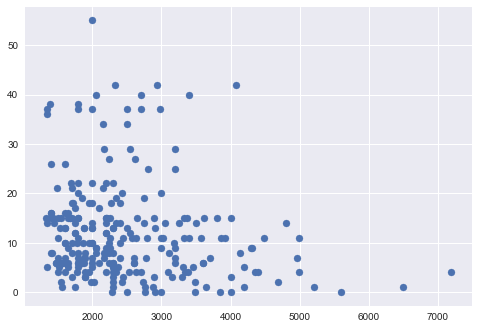

In [177]:
x = joinshort._2017_01.tolist()
y = joinshort.parkcount.tolist()
plt.scatter(x, y)

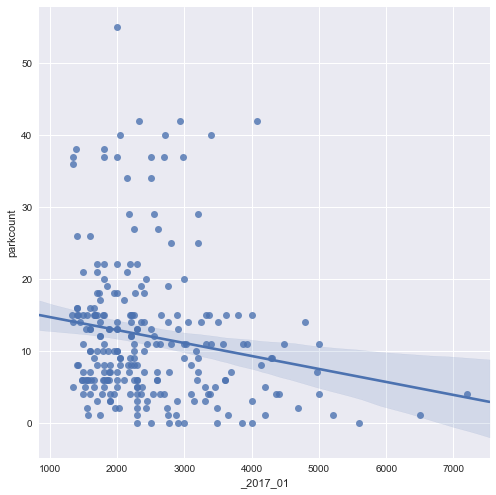

In [179]:
sns.lmplot(x="_2017_01", y="parkcount",  data=joinshort, size=7)